In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
netflix_dataset=pd.read_csv("/content/drive/MyDrive/Netflix dataset/Copy of combined_data_1.txt.zip",header=None,usecols=[0,1],names=["CustID","Rating"])

In [4]:
netflix_dataset

,CustID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [5]:
netflix_dataset.iloc[540:570,:]

,CustID,Rating
540,2031093,4.0
541,548064,5.0
542,946102,5.0
543,1790158,4.0
544,1403184,3.0
545,1535440,4.0
546,1426604,4.0
547,1815755,5.0
548,2:,NaN
549,2059652,4.0


In [6]:
# movie count
netflix_dataset.isnull().sum()

CustID       0
Rating    4499
dtype: int64

In [7]:
movie_count=netflix_dataset.isnull().sum()["Rating"]


In [8]:
# customer counts
cust_count=netflix_dataset["CustID"].nunique()-movie_count

In [9]:
cust_count

470758

In [10]:
# rating Count
rating_count=len(netflix_dataset)-movie_count

In [11]:
rating_count

24053764

In [12]:
netflix_dataset["Rating"].value_counts()

Rating
4.0    8085741
3.0    6904181
5.0    5506583
2.0    2439073
1.0    1118186
Name: count, dtype: int64

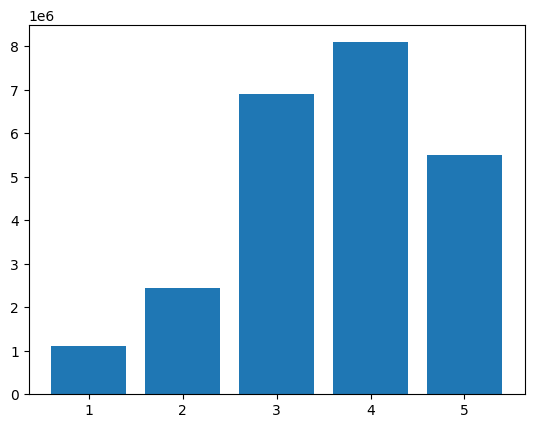

In [13]:
plt.bar(netflix_dataset["Rating"].value_counts().index,netflix_dataset["Rating"].value_counts().values)
plt.show()

In [14]:
#fixing the data to structured data

In [15]:
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [16]:
df_nan=df_nan[df_nan["Rating"]==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [17]:
df_nan=df_nan.reset_index()
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [18]:
Movie_id=1
movie_labels=[]
for i,j in zip(df_nan["index"][1:],df_nan["index"][:-1]):
  temp =np.full((1,i-j-1),Movie_id)
  movie_labels=np.append(movie_labels,temp)
  Movie_id=Movie_id+1

# for last record
temp_last=np.full((1,len(netflix_dataset)-df_nan.iloc[-1,0]-1),Movie_id)
movie_labels=np.append(movie_labels,temp_last)

In [19]:
# len(netflix_dataset)-df_nan.iloc[-1,0]-1

In [20]:
# df_nan.iloc[-1,0]

In [21]:
# df_nan["index"][1:]

In [22]:
# df_nan["index"][:-1]

In [23]:
# t=zip(df_nan["index"][1:],df_nan["index"][:-1])

In [24]:
# tuple(t)

In [25]:
movie_labels

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.499e+03, 4.499e+03,
       4.499e+03])

In [26]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]

netflix_dataset['Movie_Id']=movie_labels.astype(int)
netflix_dataset['CustID']=netflix_dataset['CustID'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset

Now the dataset will look like: 


,CustID,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [27]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [28]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [29]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

908.0

In [30]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [31]:
# Filtering customers
dataset_cust_summary=netflix_dataset.groupby('CustID')['Rating'].agg(["count"])

In [32]:
dataset_cust_summary

,count
CustID,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [33]:
#now we will create a benchmark
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

In [34]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='CustID', length=282042)

In [35]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['CustID'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (19695836, 3)


In [36]:
df_title = pd.read_csv("/content/drive/MyDrive/Netflix dataset/Copy of movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])



In [37]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [38]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357239 sha256=fd71fa2680cea096ff5ff127326f061cd57da7bfbc1b10cd76932125cb808d1b
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [39]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

In [40]:
read=Reader()

In [41]:
data=Dataset.load_from_df(netflix_dataset[['CustID','Movie_Id','Rating']][:1000000],read)

In [44]:
model=SVD()

In [46]:
cross_validate(model,data,measures=['rmse','mae'],cv=3)

{'test_rmse': array([0.96919337, 0.96770781, 0.96807102]),
 'test_mae': array([0.75793278, 0.758401  , 0.75695505]),
 'fit_time': (22.248928785324097, 20.98887300491333, 26.232672452926636),
 'test_time': (4.350017786026001, 5.1674559116363525, 4.240899085998535)}

In [47]:
# Prediction or Recomendation of the movies

In [48]:
netflix_dataset.head()

,CustID,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [49]:
# doing prediction and recomendation for any random customer lets take 1331154

In [50]:
user_1331154=df_title.copy()

In [52]:
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [53]:
user_1331154=user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [54]:
user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


In [55]:
user_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.720000
4,5,2004.0,The Rise and Fall of ECW,4.379569
5,6,1997.0,Sick,3.331679
7,8,2004.0,What the #$*! Do We Know!?,3.653611
15,16,1996.0,Screamers,3.303145
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.829728
17766,17767,2004.0,Fidel Castro: American Experience,3.829728
17767,17768,2000.0,Epoch,3.829728
17768,17769,2003.0,The Company,3.829728


In [59]:
user_1331154=user_1331154.sort_values('Estimate_Score',ascending=False)
user_1331154

,Movie_Id,Year,Name,Estimate_Score
32,33,2000.0,Aqua Teen Hunger Force: Vol. 1,5.000000
269,270,2001.0,Sex and the City: Season 4,4.695983
67,68,2004.0,Invader Zim,4.682752
223,224,1999.0,Midsomer Murders: Blood Will Out,4.524632
31,32,2004.0,ABC Primetime: Mel Gibson's The Passion of the...,4.442562
...,...,...,...,...
94,95,1985.0,Dona Herlinda and Her Son,2.971603
25,26,2004.0,Never Die Alone,2.841219
224,225,2004.0,The Cookout,2.809360
187,188,2005.0,Dead Birds,2.593304


In [60]:
user_1331154.head()["Name"]

32                        Aqua Teen Hunger Force: Vol. 1
269                           Sex and the City: Season 4
67                                           Invader Zim
223                     Midsomer Murders: Blood Will Out
31     ABC Primetime: Mel Gibson's The Passion of the...
Name: Name, dtype: object